## Malaria Cell Image Classification – An End-to-End Prediction

##### Overview

This article will discuss building a system that can detect malaria from cell images. The plan will be created in the form of a web application that can make it easier for users and even make it easier for developers who make webs.

##### Algorithm for Classification Malaria Cell Image Using Deep Learning

The first thing to do after getting the dataset is to perform an image data generator, which rescales the image and then sets the target size (150, 150) and then divides the data into training and test data. For the classification of malaria cell images, preprocessing does not take a long time. After preprocessing, we create a deep learning architecture using a Convolutional Neural Network. In this section, we have to define the number of convolutions that we will operate along with the activation function, kernel size, filters, and the number of dense layers of how many neurons to set. Then to compile the model, we need loss, optimizer, and metrics. Next, to fit the model, we must set the number of epochs, validation step, step per epoch, and verbose.

Dataset source : https://www.kaggle.com/iarunava/cell-images-for-detecting-malaria 

In [1]:
# Import the librairies
import sys
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


##### Preprocessing

In [2]:
# image data generator 
datagen=ImageDataGenerator(
                            rescale=1.0/255,
                            validation_split=0.2)

In [3]:
path_dir="C:\\Users\\Owner\\Desktop\\Malaria Detection Model\\malaria_dataset\\cell_images\\cell_images"

In [4]:
train_generator=datagen.flow_from_directory(directory=path_dir,
                                            target_size=(150,150),
                                            shuffle=True,
                                            subset='training'
                                           )

Found 22048 images belonging to 2 classes.


In [5]:
validation_generator=datagen.flow_from_directory(directory=path_dir,
                                            target_size=(150,150),
                                            shuffle=True,
                                            subset='validation'
                                           )

Found 5510 images belonging to 2 classes.


##### Build the model 

Define a model which takes (None, 150, 150, 3) input. Stack 4 convolutional layers with kernel size (3, 3) with a growing number of filters (32, 64, 128, 128). Add 2×2 pooling layer after every 2 convolutional layers (conv-conv-pool scheme). Add a dense layer with 512 neurons and a second dense layer with two neurons for classes.

In [6]:
import tensorflow as tf

In [7]:
# Activation function : relu and sigmoid 
model=tf.keras.models.Sequential([
    # first_convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPool2D(2, 2),
    # Second_convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    # third_convolution
    tf.keras.layers.Conv2D(128, (3,4), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    # fourth_convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2, activation='sigmoid')
])

- Compile model, with adam optimizer and  binary cross-entropy for loss function:

In [8]:
# compile model
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

- Fit Model , with 25 steps_per_epoch, 20 epochs, 5 validation_steps, and 2 verbose:

In [9]:
# fit
model.fit(
          train_generator,
          steps_per_epoch=25,
          epochs=20,
          validation_data=validation_generator,
          validation_steps=5,
          verbose=2)

Train for 25 steps, validate for 5 steps
Epoch 1/20
25/25 - 56s - loss: 0.7008 - accuracy: 0.5031 - val_loss: 0.6895 - val_accuracy: 0.5312
Epoch 2/20
25/25 - 54s - loss: 0.6762 - accuracy: 0.5987 - val_loss: 0.6959 - val_accuracy: 0.4719
Epoch 3/20
25/25 - 61s - loss: 0.6890 - accuracy: 0.5444 - val_loss: 0.6503 - val_accuracy: 0.6500
Epoch 4/20
25/25 - 60s - loss: 0.6128 - accuracy: 0.6844 - val_loss: 0.4620 - val_accuracy: 0.7906
Epoch 5/20
25/25 - 61s - loss: 0.4419 - accuracy: 0.8056 - val_loss: 0.2889 - val_accuracy: 0.9031
Epoch 6/20
25/25 - 59s - loss: 0.2855 - accuracy: 0.8869 - val_loss: 0.2578 - val_accuracy: 0.8906
Epoch 7/20
25/25 - 61s - loss: 0.1996 - accuracy: 0.9244 - val_loss: 0.2243 - val_accuracy: 0.9156
Epoch 8/20
25/25 - 60s - loss: 0.2105 - accuracy: 0.9431 - val_loss: 0.1948 - val_accuracy: 0.9187
Epoch 9/20
25/25 - 63s - loss: 0.1602 - accuracy: 0.9469 - val_loss: 0.2320 - val_accuracy: 0.9281
Epoch 10/20
25/25 - 61s - loss: 0.1878 - accuracy: 0.9362 - val_loss

- Based on the fit model results, we can see the accuracy of the training and validate its accuracy. The training accuracy is 0.9525 or 95.25%, and the validation accuracy is 91.25%.
- Save Model and Predict

In [10]:
# SAve model 
model.save('malaria_cell.h5') # the model is saved with name malaria_cell.h5

In [11]:
# Confusion matrix to sse the test results
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns 

Confusion matrix
[[2808    0]
 [   0 2702]]


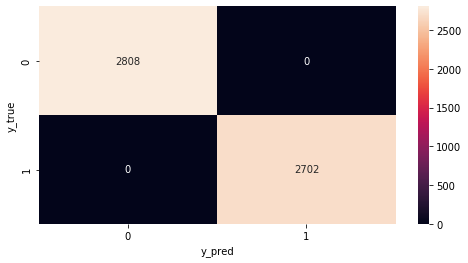

In [13]:
pred=model.predict(validation_generator)
y_pred=np.argmax(pred, axis=1)
y_true=np.argmax(pred, axis=1)
print('Confusion matrix')
print(confusion_matrix(y_true, y_pred))
# confusion matrix
f, ax=plt.subplots(figsize=(8,4))
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='.0f', ax=ax)
plt.xlabel('y_pred')
plt.ylabel('y_true')
plt.show()

Note: 0 label is Parasitized and 1 label is Uninfected.